<img src="images/tennisballbounce1.jpg" alt="Drawing" style="width: 600px;"/><img src="images/rafashot.jpg" alt="Drawing" style="width: 492px;"/>

## ATP Match Study: How ATP Players Win Matches

[Write intro here]
Like most sports, tennis is replete with statistics. Some are interesting for spectators; others useful for players coaches. Some may be only for tennis geeks or trivia enthusiasts. For this project, I wanted to see if I could find any match specific statistics that could potentially differentiate between tennis match winners and losers. Is there one thing, or perhaps a few things, that players and coaches could use to improve their chances to win more matches.

### The Stats We Measured

Here's how I performed this study.

I took data from 88,249 matches from ATP tournaments from 1991 to 2015 and divided it into two categories: 1) match winner and 2) match loser.

For each match, I collected 17 stats per player:

 -  \# of aces
 -  \# of double faults
 -  \# of first serves in
 -  total # of first serves
 -  \# of first serve points won
 -  total # of first serve points
 -  \# of second points won
 -  total # of second serve points
 -  \# of service points won
 -  total # of service points
 -  \# of first serve return points won
 -  total # of first serve return points
 -  \# of second serve return points won
 -  total # of second serve return points
 -  total # of points won
 -  total # of service games
 -  total # of return games
 -  total # of points won
 
 Additionally, I calculated six additional match statistics for each player. The reason for creating these additional statistics is to allow for relative comparisons, since the winners statistics from a raw values perspective is much different between 6-0, 6-0 match and a 7-6, 6-7, 7-6, 6-7, 7-6 match. 
 
 -  ace percentage
 -  double fault percentage
 -  service points won percentage
 -  return points won percentage
 -  break points won percentage
 -  total points won percentage

Lastly, I calculated the difference between the winners' and losers percentages for each of these six statistics plus the rank difference between the winner and loser.

There are several more statistics that I would have liked to have had. Perhaps on the next project. For now, let's take a look at what we've got.

In [1]:
import pandas as pd, csv, matplotlib.pyplot as plt, numpy as np, seaborn as sns, sklearn as sk
from sqlalchemy import create_engine

In [2]:
# Import Match Statistics and Results csv files.
statsdf = pd.read_csv('data/matchstats.csv')
results = pd.read_csv('data/results.csv')

In [3]:
statsdf = statsdf.drop(['Unnamed: 0'], axis = 1)
results = results.drop(['Unnamed: 0'], axis = 1)

In [4]:
# Set some sensible display options for data investigation
pd.options.display.max_columns = 15
pd.options.display.max_rows = 500

In [5]:
# Define Main Columns for different types of data frames
main_cols_stats = ['rank_dif','winner_ace_pct','loser_ace_pct','ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif',
                   'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct','brk_pts_dif', 'winner_points_won_pct',
                   'loser_points_won_pct', 'total_points_pct_dif']
main_cols_winner = ['winner_aces','winner_double_faults','winner_first_serves_in','winner_first_serves_total','winner_first_serve_points_won','winner_first_serve_points_total',
                    'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                    'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                    'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                    'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                    'winner_total_points_total']
main_cols_loser = ['loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total','loser_first_serve_points_won','loser_first_serve_points_total',
                   'loser_second_serve_points_won','loser_second_serve_points_total','loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won',
                   'loser_service_points_total','loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                   'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                   'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total']

## First let's look at some overall match statistics.

In [6]:
print('The average match lasts ' + str(round(statsdf['match_duration'].mean(),2)) + ' minutes.')
print('On average, the matches had a total of ' + str(round(statsdf['winner_total_points_total'].mean(),2)) + ' points.')
print('On average, the match had a total of ' + str(round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ) ,2) ) + ' games played.')

The average match lasts 99.98 minutes.
On average, the matches had a total of 157.04 points.
On average, the match had a total of 24.63 games played.


In [7]:
statsdf[main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88206.0,52.060325,195.197622,-1777.000000,-19.000000,24.000000,75.000000,2126.000000
winner_ace_pct,88206.0,8.340684,6.336654,0.000000,3.676471,6.976744,11.538462,56.756757
loser_ace_pct,88206.0,5.599402,4.661899,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88206.0,2.741282,7.339634,-31.668052,-1.708619,2.085035,6.666667,55.002371
winner_df_pct,88206.0,3.471327,2.647796,0.000000,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88206.0,4.511130,3.174744,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88206.0,-1.039803,3.907960,-35.416667,-3.340081,-0.891303,1.458333,18.987342
winner_srv_pts_pct,88206.0,68.222500,6.719134,19.696970,63.529412,67.857143,72.580645,100.000000
loser_srv_pts_pct,88206.0,56.694481,7.437214,14.285714,52.054795,57.031250,61.682243,85.185185
srv_pts_dif,88206.0,11.528019,9.118613,-39.393939,5.032660,10.270140,16.763087,68.292683


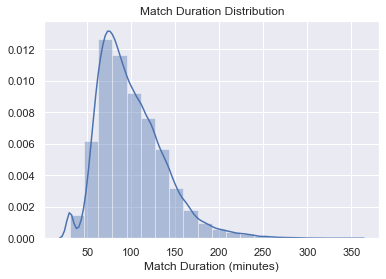

In [8]:
sns.set(color_codes=True)
sns.distplot(statsdf['match_duration'],bins=20, kde=True, axlabel='Match Duration (minutes)').set_title('Match Duration Distribution');
plt.savefig("matchduration.png")

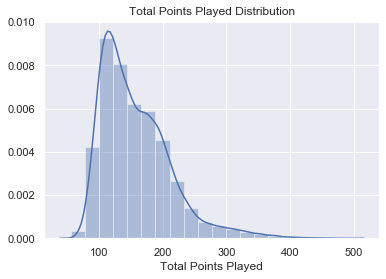

In [9]:
sns.set(color_codes=True)
sns.distplot(statsdf['winner_total_points_total'],bins=20, axlabel='Total Points Played').set_title('Total Points Played Distribution');
plt.savefig("totalpointsplayed.png")

In [10]:
print('The winner won an average of ' + str(round(statsdf['winner_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['winner_total_points_won'].mean(),2)) + ' points.')
print('On average, the loser won ' + str(round(statsdf['loser_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['loser_total_points_won'].mean(),2)) + ' points.')
print('A difference of ' + str(round( ( statsdf['winner_points_won_pct'].mean() - statsdf['loser_points_won_pct'].mean()),2)) + ' percent, or '
      + str(round((statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean()),2)) + ' points.')

The winner won an average of 55.47 percent of the points, or 85.69 points.
On average, the loser won 44.53 percent of the points, or 71.37 points.
A difference of 10.94 percent, or 14.32 points.


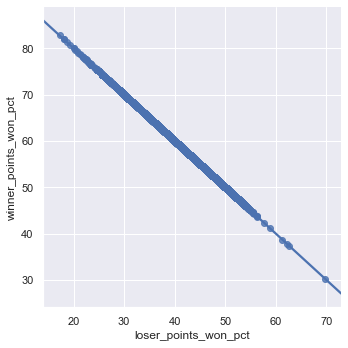

In [11]:
x = 'loser_points_won_pct'
y = 'winner_points_won_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

In [12]:
df = statsdf[['winner_points_won_pct','loser_points_won_pct']]
x = df[(df.winner_points_won_pct > df.loser_points_won_pct)].count()
print(x/len(df))
print(len(df))


winner_points_won_pct    0.942861
loser_points_won_pct     0.942861
dtype: float64
88206


winner_ace_pct    0.638981
loser_ace_pct     0.638981
dtype: float64
88206


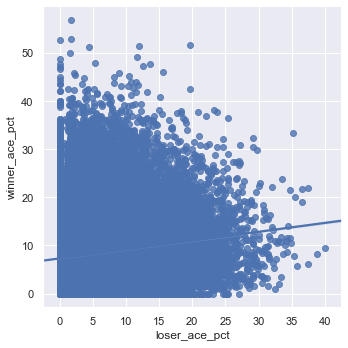

In [13]:
df = statsdf[['winner_ace_pct','loser_ace_pct']]
x = df[(df.winner_ace_pct > df.loser_ace_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_ace_pct'
y = 'winner_ace_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_df_pct    0.587806
loser_df_pct     0.587806
dtype: float64
88206


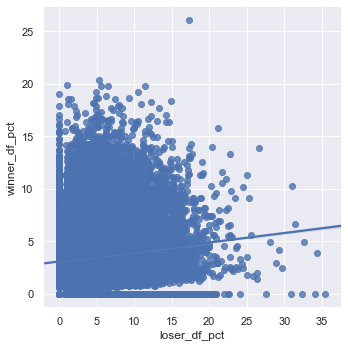

In [14]:
df = statsdf[['winner_df_pct','loser_df_pct']]
x = df[(df.winner_df_pct < df.loser_df_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_df_pct'
y = 'winner_df_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_srv_pts_pct    0.926853
loser_srv_pts_pct     0.926853
dtype: float64
88206


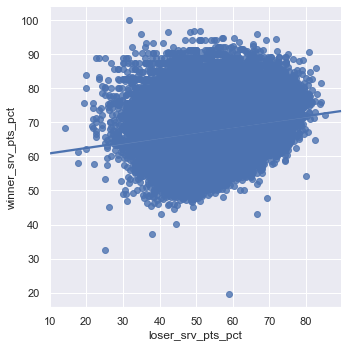

In [15]:
df = statsdf[['winner_srv_pts_pct','loser_srv_pts_pct']]
x = df[(df.winner_srv_pts_pct > df.loser_srv_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_srv_pts_pct'
y = 'winner_srv_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_rtn_pts_pct    0.925595
loser_rtn_pts_pct     0.925595
dtype: float64
88206


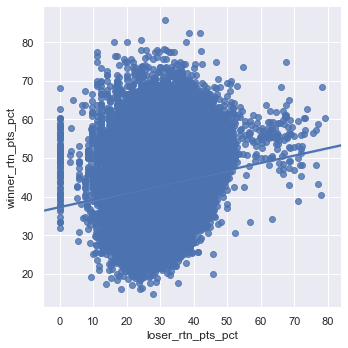

In [16]:
df = statsdf[['winner_rtn_pts_pct','loser_rtn_pts_pct']]
x = df[(df.winner_rtn_pts_pct > df.loser_rtn_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_rtn_pts_pct'
y = 'winner_rtn_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_brk_pts_pct    0.706585
loser_brk_pts_pct     0.706585
dtype: float64
88206


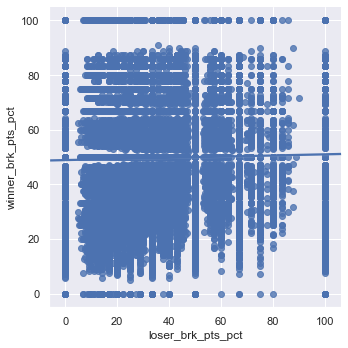

In [17]:
df = statsdf[['winner_brk_pts_pct','loser_brk_pts_pct']]
x = df[(df.winner_brk_pts_pct > df.loser_brk_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_brk_pts_pct'
y = 'winner_brk_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_rank_number    0.65491
loser_rank_number     0.65491
dtype: float64
88206


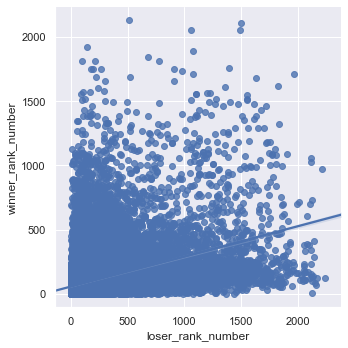

In [18]:
df = statsdf[['winner_rank_number','loser_rank_number']]
x = df[(df.winner_rank_number < df.loser_rank_number)].count()
print(x/len(df))
print(len(df))
x = 'loser_rank_number'
y = 'winner_rank_number'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

In [19]:
total_games_played = round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ),2)
points_difference = round( (statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean() ),2)
points_per_game_difference = round((points_difference / total_games_played),2)

print('This is only a difference of ' + str(points_per_game_difference) + ' points per game.' )

This is only a difference of 0.58 points per game.


#### Now tennis is a bit different from most other professional sports in a couple of ways. First, players don't just try to 'score points'; they 'compete' for points--for every point played, one player wins that point, and the other players 'loses' the point. Unlike baseball, soccer, football, hockey, etc., where teams/players just try to score points, and the team/player with the most points wins. In other words, in tennis if the score is 1-0 (15-Love), and one player wins the next point, the score would be either 1-1 (15-all) or 2-0 (30-Love).

#### Which leads to the second point. Since the difference is potentially a 2- point swing, and because a player needs to win by 2 points in order to win a game, the seemingly small difference in points won per game per match, could potentially change the outcome of a match if a player could improve certain aspects of their game.

### So let's look at the winner statistics.

In [20]:
statsdf.loc[:,main_cols_winner].describe().T

,count,mean,std,min,25%,50%,75%,max
winner_aces,88206.0,6.236208,5.080645,0.0,3.0,5.0,9.0,61.0
winner_double_faults,88206.0,2.728306,2.340481,0.0,1.0,2.0,4.0,23.0
winner_first_serves_in,88206.0,45.306260,20.206875,0.0,32.0,43.0,56.0,194.0
winner_first_serves_total,88206.0,77.114323,28.263841,22.0,56.0,72.0,93.0,258.0
winner_first_serve_points_won,88206.0,35.209612,13.150131,3.0,26.0,33.0,42.0,148.0
winner_first_serve_points_total,88206.0,46.838118,18.370071,9.0,33.0,43.0,57.0,194.0
winner_second_serve_points_won,88206.0,16.605276,6.795583,0.0,12.0,16.0,20.0,65.0
winner_second_serve_points_total,88206.0,30.276206,13.020946,0.0,21.0,28.0,37.0,120.0
winner_break_points_saved,88206.0,3.369091,3.106528,0.0,1.0,3.0,5.0,24.0
winner_break_points_serve_total,88206.0,5.014738,4.107742,0.0,2.0,4.0,7.0,34.0


### Now let's look at the loser statistics.

In [21]:
statsdf.loc[:,main_cols_loser].describe().T

,count,mean,std,min,25%,50%,75%,max
loser_aces,88206.0,4.616579,4.420291,0.0,2.0,3.0,6.0,56.0
loser_double_faults,88206.0,3.513060,2.595205,0.0,2.0,3.0,5.0,26.0
loser_first_serves_in,88206.0,47.233635,18.529821,7.0,34.0,44.0,57.0,196.0
loser_first_serves_total,88206.0,79.926762,28.097246,27.0,59.0,74.0,95.0,273.0
loser_first_serve_points_won,88206.0,31.227252,13.835378,1.0,21.0,29.0,39.0,145.0
loser_first_serve_points_total,88206.0,47.233635,18.529821,7.0,34.0,44.0,57.0,196.0
loser_second_serve_points_won,88206.0,14.838197,7.038972,0.0,10.0,14.0,19.0,66.0
loser_second_serve_points_total,88206.0,32.693127,12.963069,0.0,23.0,30.0,40.0,134.0
loser_break_points_saved,88206.0,4.785922,3.224078,-6.0,2.0,4.0,7.0,28.0
loser_break_points_serve_total,88206.0,8.738782,4.023053,0.0,6.0,8.0,11.0,35.0


### What about the statistical categories we created to compare the differences between winner and loser.

In [22]:
statsdf.loc[:,main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88206.0,52.060325,195.197622,-1777.000000,-19.000000,24.000000,75.000000,2126.000000
winner_ace_pct,88206.0,8.340684,6.336654,0.000000,3.676471,6.976744,11.538462,56.756757
loser_ace_pct,88206.0,5.599402,4.661899,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88206.0,2.741282,7.339634,-31.668052,-1.708619,2.085035,6.666667,55.002371
winner_df_pct,88206.0,3.471327,2.647796,0.000000,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88206.0,4.511130,3.174744,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88206.0,-1.039803,3.907960,-35.416667,-3.340081,-0.891303,1.458333,18.987342
winner_srv_pts_pct,88206.0,68.222500,6.719134,19.696970,63.529412,67.857143,72.580645,100.000000
loser_srv_pts_pct,88206.0,56.694481,7.437214,14.285714,52.054795,57.031250,61.682243,85.185185
srv_pts_dif,88206.0,11.528019,9.118613,-39.393939,5.032660,10.270140,16.763087,68.292683


### So it looks like the winner did better in every category, although some of the differences (aces and double faults) are relatively small. Note that For double faults, 'df_dif', is negative, which means the winner had fewer double faults than the loser, which is better.)

### Let's visually examine the differences between the winners' and losers' statistics in the other five categories I created. (We looked at total points won percentage already.)

### Ace Percentage

In [23]:
ace_stats_columns = ['winner_ace_pct','loser_ace_pct']
ace_stats_df = pd.DataFrame(statsdf[ace_stats_columns])
new_columns = ['Winner', 'Loser']
ace_stats_df.columns = new_columns
ace_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,8.340684,6.336654,0.0,3.676471,6.976744,11.538462,56.756757
Loser,88206.0,5.599402,4.661899,0.0,2.127660,4.587156,7.865169,40.000000


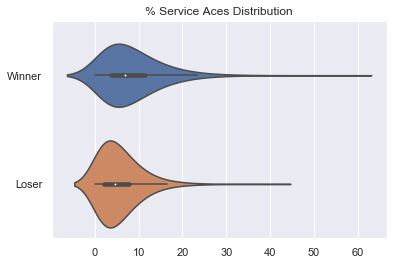

In [24]:
ax = sns.violinplot(data = ace_stats_df, bw=0.5, orient="h")
ax.set_title('% Service Aces Distribution')
plt.savefig("acepercentviolinplot.png")

### Double Fault Percentage

In [25]:
# Pre-format DataFrame
doublefault_stats_columns = ['winner_df_pct','loser_df_pct']
doublefault_stats_df = pd.DataFrame(statsdf[doublefault_stats_columns])
new_columns = ['Winner', 'Loser']
doublefault_stats_df.columns = new_columns
doublefault_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,3.471327,2.647796,0.0,1.612903,3.076923,4.938272,26.027397
Loser,88206.0,4.511130,3.174744,0.0,2.150538,4.000000,6.250000,35.416667


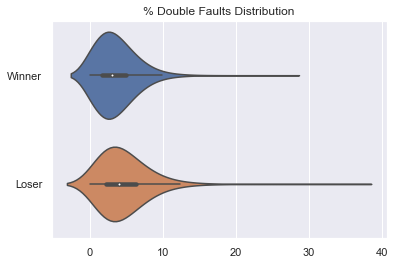

In [26]:
ax = sns.violinplot(data = doublefault_stats_df, bw=0.5, orient="h")
ax.set_title('% Double Faults Distribution')
plt.savefig("dfpercentviolinplot.png")

### Service Points Won Percentage

In [27]:
# Pre-format DataFrame
servicepoints_stats_columns = ['winner_srv_pts_pct','loser_srv_pts_pct']
servicepoints_stats_df = pd.DataFrame(statsdf[servicepoints_stats_columns])
new_columns = ['Winner', 'Loser']
servicepoints_stats_df.columns = new_columns
servicepoints_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,68.222500,6.719134,19.696970,63.529412,67.857143,72.580645,100.000000
Loser,88206.0,56.694481,7.437214,14.285714,52.054795,57.031250,61.682243,85.185185


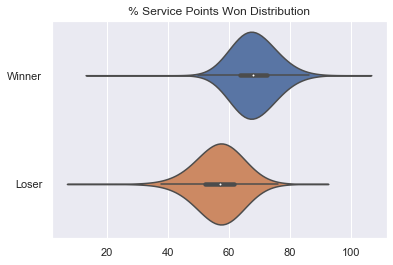

In [28]:
ax = sns.violinplot(data = servicepoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Service Points Won Distribution')
plt.savefig("serviceptspctviolinplot.png")

### Return Points Won Percentage

In [29]:
# Pre-format DataFrame
returnpoints_stats_columns = ['winner_rtn_pts_pct','loser_rtn_pts_pct']
returnpoints_stats_df = pd.DataFrame(statsdf[returnpoints_stats_columns])
new_columns = ['Winner', 'Loser']
returnpoints_stats_df.columns = new_columns
returnpoints_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,43.319388,7.449335,14.814815,38.317757,42.982456,47.959184,85.714286
Loser,88206.0,31.802591,6.894812,0.000000,27.419355,32.142857,36.486486,79.166667


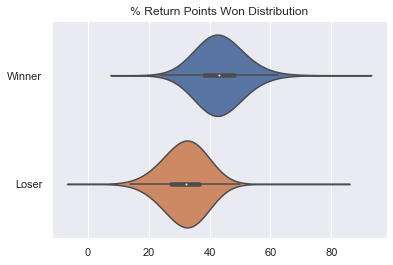

In [30]:
ax = sns.violinplot(data = returnpoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Return Points Won Distribution')
plt.savefig("returnptspctviolinplot.png")

### Break Points Won Percentage

In [31]:
# Pre-format DataFrame
breakpoints_stats_columns = ['winner_brk_pts_pct','loser_brk_pts_pct']
breakpoints_stats_df = pd.DataFrame(statsdf[breakpoints_stats_columns])
new_columns = ['Winner', 'Loser']
breakpoints_stats_df.columns = new_columns
breakpoints_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,49.534994,19.620488,0.0,36.363636,50.000000,60.0,100.0
Loser,88206.0,31.585153,28.057964,0.0,0.000000,28.571429,50.0,100.0


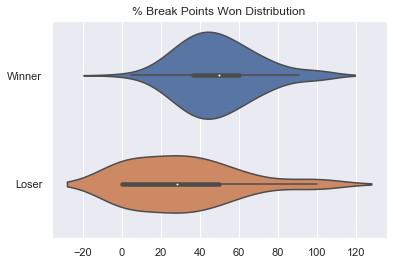

In [32]:
ax = sns.violinplot(data = breakpoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Break Points Won Distribution')
plt.savefig("breakptspctviolinplot.png")

In [33]:
total_points_won_columns = ['winner_points_won_pct','loser_points_won_pct']
total_points_df = pd.DataFrame(statsdf[total_points_won_columns])
new_columns = ['Winner', 'Loser']
total_points_df.columns = new_columns
total_points_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Winner,88206.0,55.467523,4.115671,30.303030,52.525253,54.819277,57.731959,82.758621
Loser,88206.0,44.532477,4.115671,17.241379,42.268041,45.180723,47.474747,69.696970


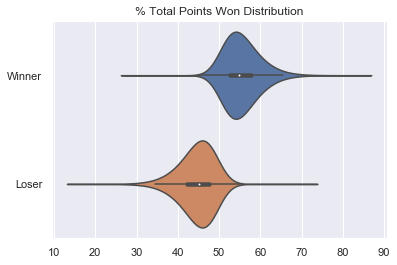

In [34]:
ax = sns.violinplot(data = total_points_df, bw=0.5, orient="h")
ax.set_title('% Total Points Won Distribution')
plt.savefig("totalptswonpctviolinplot.png")

Working Space Below